In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [8]:
dirs = glob('./data/*.mat')
dirs

['./data/LNP_spk_all.mat', './data/LNP_lam_all.mat']

In [9]:
import mat73
data_dict = mat73.loadmat(dirs[0])

In [12]:
data_dict['spikes'].shape

(4800000, 100)

In [13]:
data_dict_2 = mat73.loadmat(dirs[1])
data_dict_2.keys()

dict_keys(['lambda'])

In [16]:
data_dict_2['lambda'].shape

(4800000, 100)

In [23]:
def plot_lambda_raster(im_o, im_t):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(90, 80))
    time = im_o.shape[0] / 10000
    extent = [0, time, 0, 100]
    im_o = axes[0].imshow(np.transpose(im_o), cmap='binary', extent=extent)
    im_t = axes[1].imshow(np.transpose(im_t), cmap='binary', extent=extent)
    ylabel = 'Lambda'
    axes[0].set_title('Prediction\n', fontsize = 30)
    axes[0].set_xlabel('Time(s)', fontsize = 30)
    axes[0].set_ylabel('Node index', fontsize = 30)
    axes[0].set_aspect(0.1)
    axes[0].tick_params(axis='x', labelsize=20)
    axes[0].tick_params(axis='y', labelsize=20)
    axes[1].set_title('Target\n', fontsize = 30)
    axes[1].set_xlabel('Time(s)', fontsize = 30)
    axes[1].set_ylabel('Node index', fontsize = 30)
    axes[1].set_aspect(0.1)
    axes[1].tick_params(axis='x', labelsize=20)
    axes[1].tick_params(axis='y', labelsize=20)
    cax_o = fig.add_axes([axes[0].get_position().x1+0.01,axes[0].get_position().y0,0.02,axes[0].get_position().height])
    cax_t = fig.add_axes([axes[1].get_position().x1+0.01,axes[1].get_position().y0,0.02,axes[1].get_position().height])
    cbar1 = plt.colorbar(im_o, cax=cax_o)
    cbar2 = plt.colorbar(im_t, cax=cax_t)
    cbar1.ax.set_ylabel(ylabel, fontsize=30)
    cbar1.ax.tick_params(axis='y', labelsize=20)
    cbar2.ax.set_ylabel(ylabel, fontsize=30)
    cbar2.ax.tick_params(axis='y', labelsize=20)
#     plt.savefig(‘./fig/lamall_RNN_{}.png’.format(suffix), bbox_inches=‘tight’)


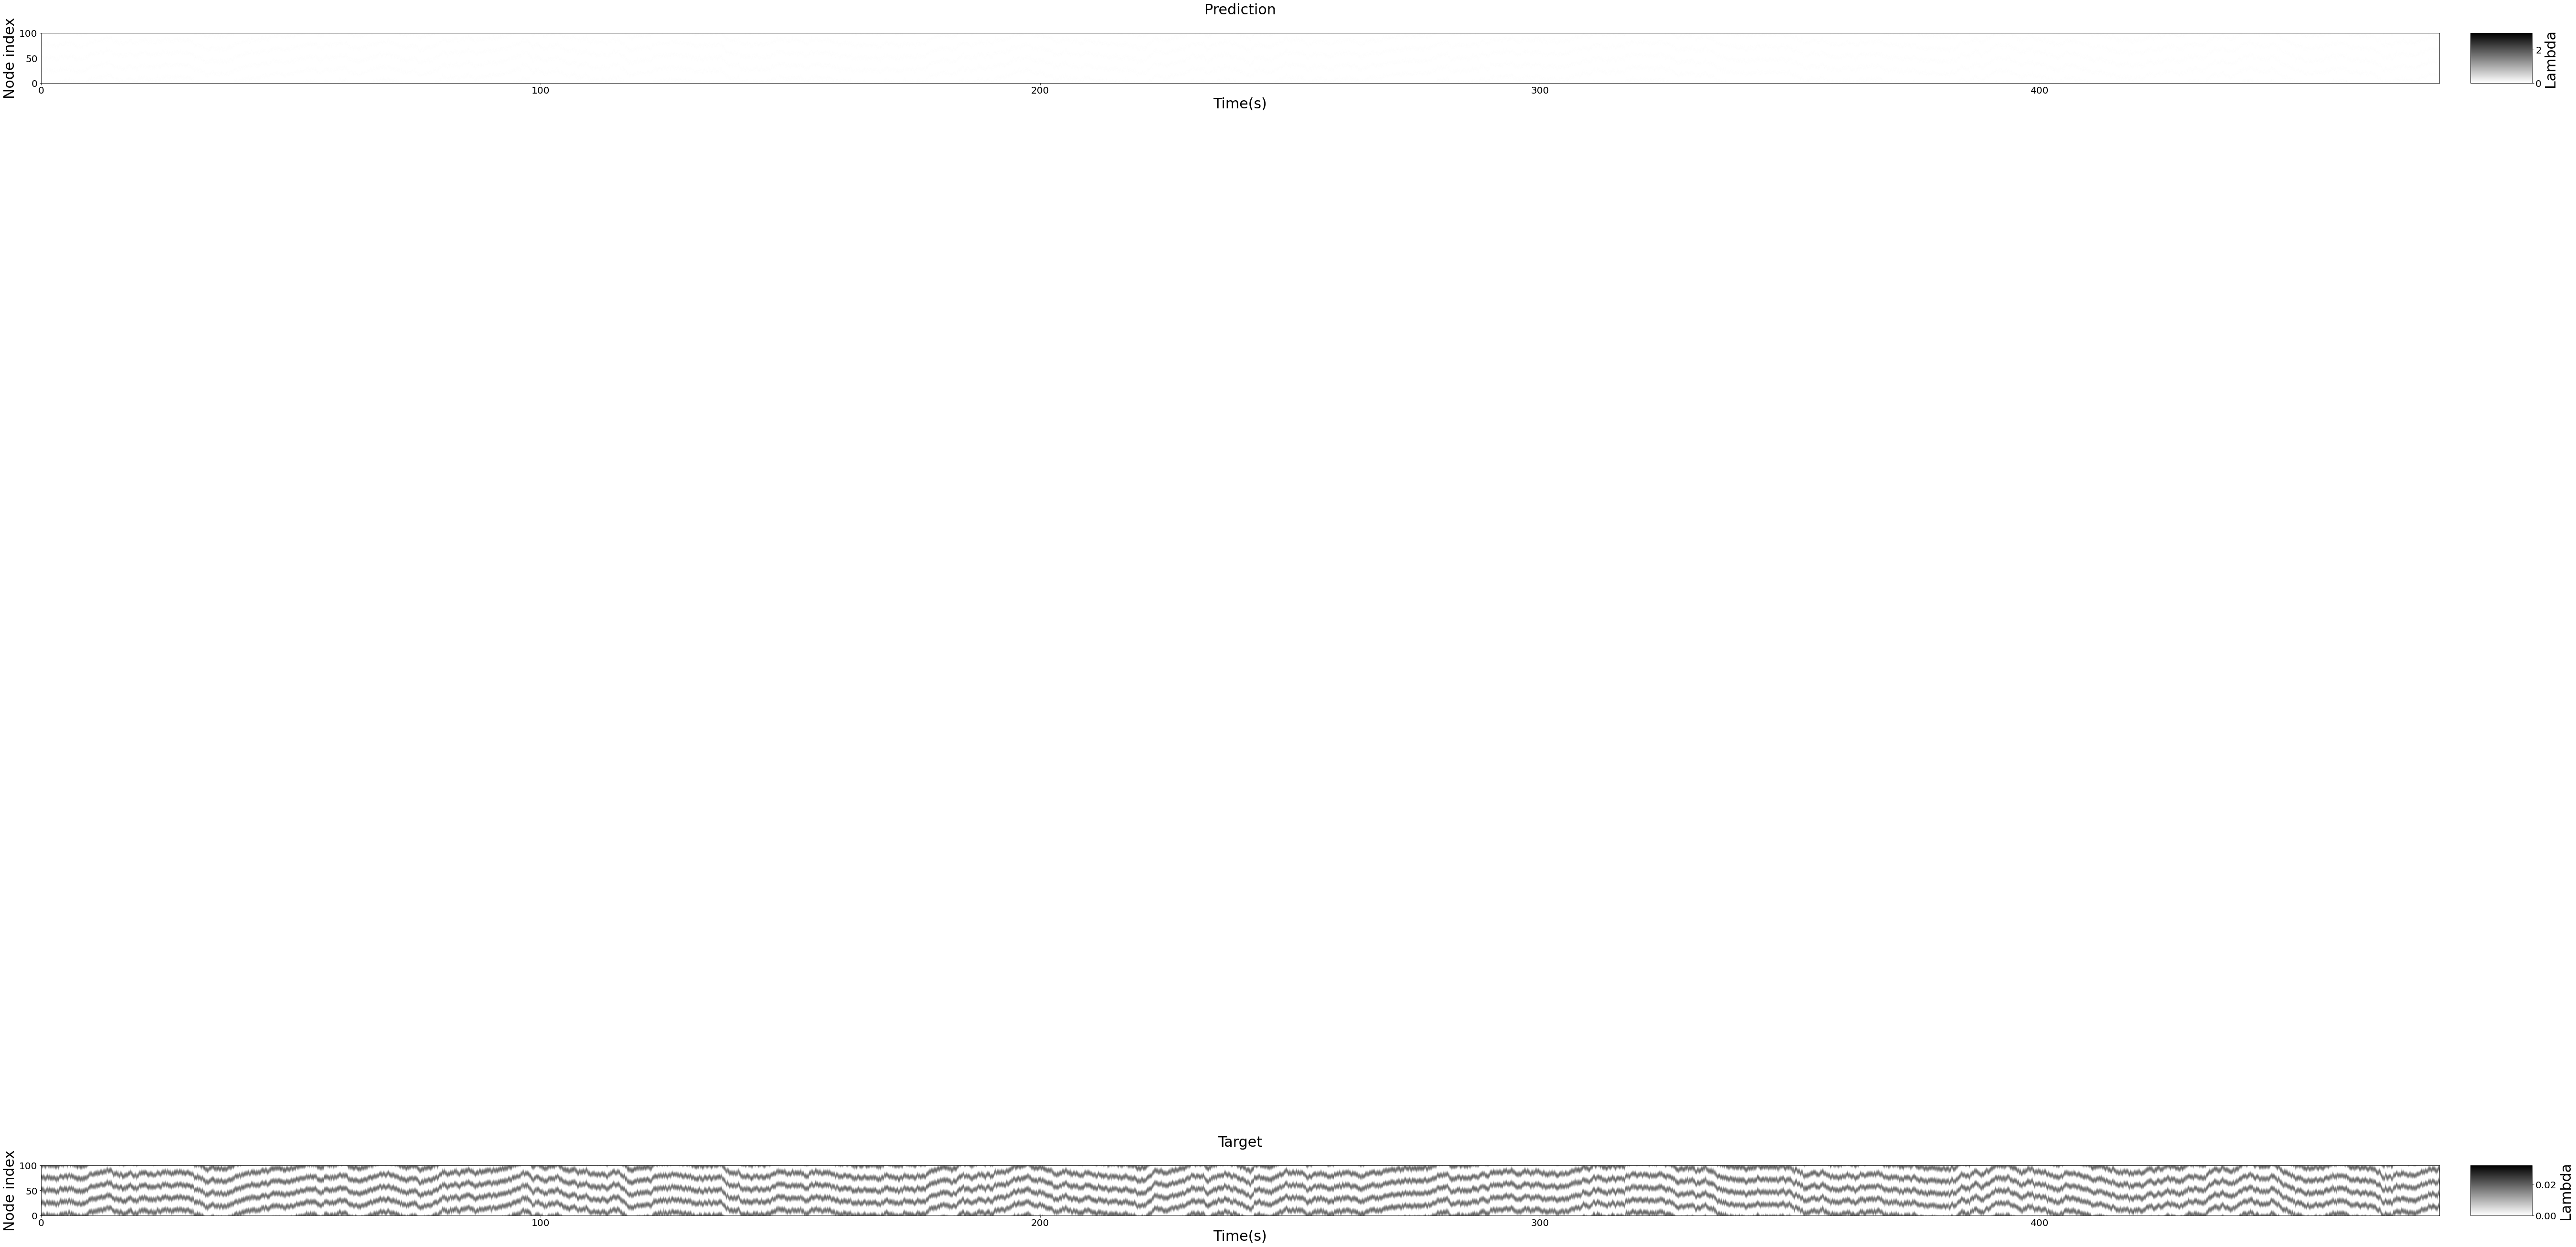

In [24]:
plot_lambda_raster(data_dict['spikes'], data_dict_2['lambda'])

In [2]:
import pickle

In [3]:
spike = pickle.load(open('./data/LNP_spk_all.pickle', 'rb'))

In [5]:
spike.shape

(4800000, 100)

In [7]:
lam = pickle.load(open('./data/LNP_lam_all.pickle', 'rb'))

In [8]:
lam.shape

(4800000, 100)

In [13]:
data = spike[:1000].transpose((1,0))
lam_1 = lam[:1000].transpose((1,0))

In [14]:
num_neurons = data.shape[0]
total_time = data.shape[-1]

In [15]:
time_steps = 200 #previous time steps = 20ms
pred_steps = 20 #steps to predict
window_size = time_steps + pred_steps - 1 # for training only
batch_size = int(np.floor(total_time / (window_size + 1)) - 1)

In [16]:
window_size

219

In [17]:
batch_size

3

In [18]:
fully_connected = np.ones((num_neurons, num_neurons)) - np.eye(num_neurons)

In [20]:
fully_connected.shape

(100, 100)

In [21]:
encoder_edge = np.where(fully_connected)
encoder_edge = np.array([encoder_edge[0], encoder_edge[1]], dtype=np.int64)

In [22]:
encoder_edge

array([[ 0,  0,  0, ..., 99, 99, 99],
       [ 1,  2,  3, ..., 96, 97, 98]])

In [23]:
encoder_edge.shape

(2, 9900)